# Line Source Analysis

In this notebook, we will go through the steps of comparing the measured and simulated data obtained from the line source. 

In the image-space, we will calculate the

- Image resolution in each of the three directions

In [1]:
from analysis_fns import plot_img, fwhm_supersample
import numpy as np
import os

%matplotlib notebook

Let's first load one of the measured images.

<IPython.core.display.Javascript object>


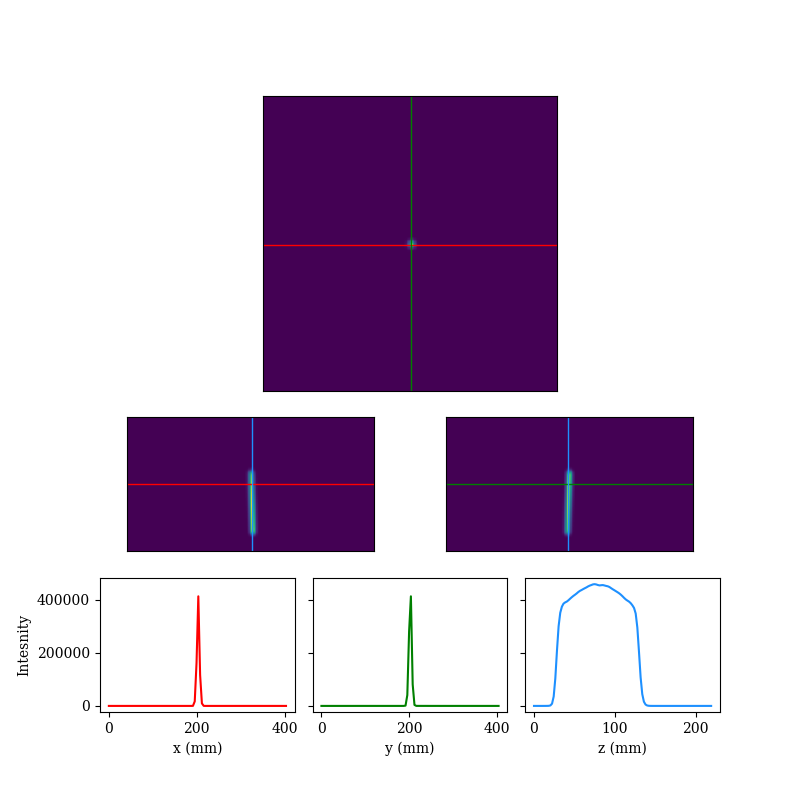

In [2]:
image_fn = '../patients/line_meas/pet_image_1.v'
pet_scan = np.fromfile(image_fn, dtype=np.float32)
# Order: z, x, y
pet_scan = pet_scan.reshape((109,200,200))
# Remove some of the empty space
pet_scan = pet_scan[:,50:-50,50:-50]

plot_img(pet_scan, vmin=np.min(pet_scan), vmax=np.max(pet_scan), 
          slice_indx=(np.array(pet_scan.shape)/2).astype(int),
              spacing=np.array([2.027, 4.07283, 4.07283]),
         draw_lines=True)

The resolution is mesured by supersampling the profiles along the central 60% of the line source and then fitting a Gaussian curve to this supersampled profile. The FWHM is then $2.35\sigma$ where $\sigma$ is the width of the estimated Gaussian curve.

FWHM = 6.613


<IPython.core.display.Javascript object>


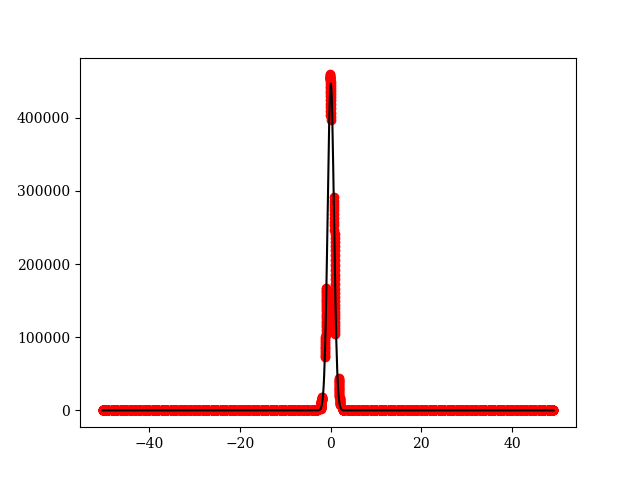

In [3]:
# Taking slices along the z-axis
slice_axis=0
# Measuring the profile along the x-axis
prof_axis=2
# Width of pixels along the profile
pixel_size=4.07283
# Perform calculation
res = fwhm_supersample(pet_scan, slice_axis=slice_axis, prof_axis=prof_axis, 
                       central_frac=6/10, threshold=1e3,
                       pixel_size=pixel_size, plot=True)

We can perform the same calculation on all 12 images without going through the process of plotting them.

In [4]:
image_fns = ['../patients/line_meas/pet_image_1.v',
             '../patients/line_meas/pet_image_2.v',
             '../patients/line_meas/pet_image_3.v',
             '../patients/line_meas/pet_image_4.v',
             '../patients/line_meas/pet_image_5.v',
             '../patients/line_meas/pet_image_6.v',
             '../patients/line_simu/pet_image_1.v',
             '../patients/line_simu/pet_image_2.v',
             '../patients/line_simu/pet_image_3.v',
             '../patients/line_simu/pet_image_4.v',
             '../patients/line_simu/pet_image_5.v',
             '../patients/line_simu/pet_image_6.v']

slice_axes = [0,0,0,0,2,2,0,0,0,0,2,2]
prof_axes = [2,2,1,1,0,0,2,2,1,1,0,0]

res_ = []
for image_fn, slice_axis, prof_axis in zip(image_fns, slice_axes, prof_axes):
    
    if prof_axis==0:
        pixel_size = 2.027
    else:
        pixel_size = 4.07283
    print('\nFilename:', image_fn)
    pet_scan = np.fromfile(image_fn, dtype=np.float32)
    pet_scan = pet_scan.reshape((109,200,200))
    pet_scan = pet_scan[:,50:-50,50:-50]
    
    res_.append(fwhm_supersample(pet_scan, slice_axis=slice_axis, prof_axis=prof_axis, threshold=1e3, central_frac=6/10,
                              pixel_size=pixel_size, plot=False))



Filename: ../patients/line_meas/pet_image_1.v
FWHM = 6.613

Filename: ../patients/line_meas/pet_image_2.v
FWHM = 6.183

Filename: ../patients/line_meas/pet_image_3.v
FWHM = 6.248

Filename: ../patients/line_meas/pet_image_4.v
FWHM = 6.470

Filename: ../patients/line_meas/pet_image_5.v
FWHM = 6.478

Filename: ../patients/line_meas/pet_image_6.v
FWHM = 6.496

Filename: ../patients/line_simu/pet_image_1.v
FWHM = 6.210

Filename: ../patients/line_simu/pet_image_2.v
FWHM = 5.771

Filename: ../patients/line_simu/pet_image_3.v
FWHM = 5.757

Filename: ../patients/line_simu/pet_image_4.v
FWHM = 5.935

Filename: ../patients/line_simu/pet_image_5.v
FWHM = 5.939

Filename: ../patients/line_simu/pet_image_6.v
FWHM = 5.995
